In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


11501568/11490434 [==============================] - 0s 0us/step
x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [3]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=64,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=128,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [5]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=50, validation_data=(x_test.reshape(-1,28,28,1), t_test))

Epoch 1/50
1200/1200 [==============================] - 16s 4ms/step - loss: 0.2112 - accuracy: 0.9316 - val_loss: 0.0479 - val_accuracy: 0.9843
Epoch 2/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 3/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 5/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0250 - val_accuracy: 0.9915
Epoch 6/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0219 - val_accuracy: 0.9925
Epoch 7/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0229 - val_accuracy

In [6]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9945


[0.02327597513794899, 0.9944999814033508]

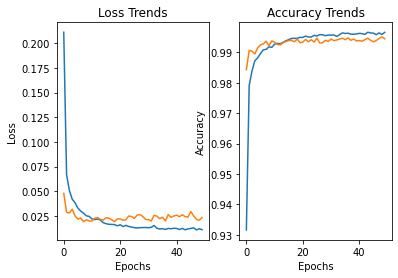

In [7]:
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [8]:
ret_val = model.predict(x_test.reshape(-1,28,28,1))

print(f'ret_val.type : {type(ret_val)}, ret_val.shape : {ret_val.shape}')

predicted_val = np.argmax(ret_val,axis=1)

predicted_comp_list = np.equal(predicted_val, t_test)

index_label_prediction = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_comp_list) if result == False ]

print(len(index_label_prediction))



ret_val.type : <class 'numpy.ndarray'>, ret_val.shape : (10000, 10)
55


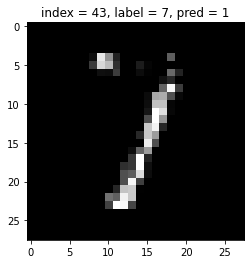

In [9]:
false_data_index = np.random.randint(len(index_label_prediction))

mnist_index = index_label_prediction[false_data_index][0]
label = index_label_prediction[false_data_index][1]
prediction = index_label_prediction[false_data_index][2]

title_str = f'index = {false_data_index}, label = {label}, pred = {prediction}'

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img,cmap='gray')
plt.show()